<a href="https://colab.research.google.com/github/elmaazouziyassine/Machine_Learning_Python/blob/master/1_Regression/Support%20Vector%20Regression%20(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Regression (SVR)**



### **Data Preprocessing**




In [0]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [62]:
# Import dataset
dataset = 'https://raw.githubusercontent.com/elmaazouziyassine/Machine_Learning_Python/master/1_Regression/positions_salaries.csv'
data = pd.read_csv(dataset)
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [63]:
data.count()

Position    10
Level       10
Salary      10
dtype: int64

In [64]:
# Separate Features Variables from Target Variable
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

Note : 
- Regarding the nature of the dataset, we cannot split the dataset. All recors have to be included.



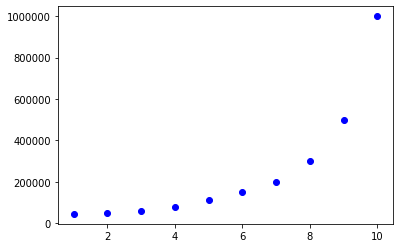

In [65]:
plt.scatter(X, y, c = 'blue')

In [0]:
# Apply Feature Scaling as the SVR library does not apply it automatically 
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
scale_y = StandardScaler()
X = scale_X.fit_transform(X)
y = y.reshape(-1,1)
y = scale_y.fit_transform(y)

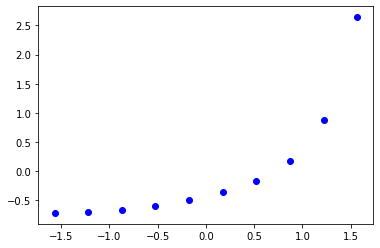

In [67]:
plt.scatter(X, y, c = 'blue')

### **Apply the model to the dataset**



In [68]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')  # choose a non linear Kernet as the problem is not linear.
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### **Predict new results**

In [69]:
# Predict the salary associated to level 6.5 using SVR (has to be compared with the results in Polynomial notebook)
c= scale_y.inverse_transform(regressor.predict(scale_X.transform([[6.5]])))
c

array([170370.0204065])

### **Visualize the results**

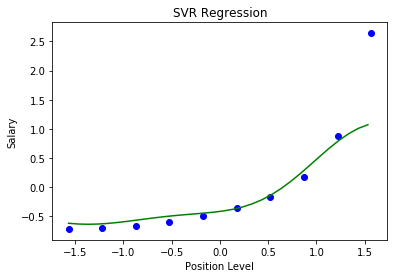

In [70]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, c = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), c = 'green')

plt.title('SVR Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Note: The model does not fit to the level 10 as this position level is considered as an outlier.

### **Test the performance of the model**

In [71]:
y_pred = 
error = (y-y_pred)*100/y   # Error in %
error

SyntaxError: ignored